# Practicum 2: Wetten van Kirchoff

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import sympy as sp
from IPython.display import display
sp.init_printing()

# 0. Vooraf: definiëren van functies, symbolen,...

In [2]:
# Functie die symbolisch de foutenpropagatie weergeeft:

def error(functie, variabelen, fouten):   # variabelen en fouten zijn twee lijsten met symbolen
    fout = 0
    
    if len(variabelen)!= len(fouten):
        raise ValueError('Lengte variabelen komt niet overeen met lengte fouten')
        
    for i in range(len(variabelen)):
        fout += sp.diff(functie, variabelen[i])**2 * fouten[i]**2
        
    fout = sp.sqrt(fout)
    return fout

In [3]:
# Effectief de fouten berekenen voor een gegeven lijst van waarden:  WERKT NOG NIETTTT

def errorcalc(functie, variabelen, waardenvar, fouten, waardenfouten): # variabelen en fouten zijn dictionaries!!
    resultaten = []
    fouten = []
    
    for i in range(len(variabelen)):
        expr = functie
        for variabele in variabelen:
            print(variabele)
            expr = expr.subs(variabele, waardenvar[str(variabele)][i])
        resultaten.append(expr)
    
    #if len(variabelen)!= len(fouten):
        #raise ValueError('Lengte variabelen komt niet overeen met lengte fouten')
    
    
            
    print('Berekende waarden zijn ',resultaten)
    print('Berekende fouten zijn ', fouten)
    
    return

## Opgaven van het practicum:

### 1. Berekenen van de eerste opgave

### 1.1 Ingeven symbolen en bepalen foutenpropagatieformule

In [4]:
#var = np.loadtxt("bestand.txt",skiprows=2,delimiter='\t')

V0, Vg, I = sp.symbols('V0 Vg I')
variabelen = [V0,Vg,I]

sV0, sVg, sI =sp.symbols('sV0, sVg, sI')
deltavariabelen = [sV0,sVg, sI]

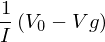

In [5]:
inwendigeweerstand = (V0 - Vg)/I
display(inwendigeweerstand)

In [6]:
foutenpropagatie = error(inwendigeweerstand, variabelen, deltavariabelen)

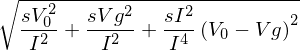

In [7]:
display(foutenpropagatie)

## 1.2 Eerste spanningsbron

In [8]:
# Ingeven van de waarden VOOR DE EERSTE :

vg1  = [4.68 , 4.71 , 4.74 , 4.67 , 4.71]
svg1  = [0.02]   # let op delta syst is 0.06 niet 0.03 --> 0.06/sqrt(12)

v01  = [4.79]
sv01 = [0.02]

I1   = [6.26 *10**-3, 4.78 *10**-3, 3.20 *10**-3, 6.88 *10**-3, 4.73 *10**-3]
sI1  = [0.02 *10**-3, 0.02 *10**-3, 0.01 *10**-3, 0.02 *10**-3, 0.02 *10**-3]



In [9]:
len(vg1) == len(I1)

True

In [10]:
weerstanden1 = []
for i in range(len(vg1)):
    weerstanden1.append(inwendigeweerstand.subs(  {V0:v01[0], Vg:vg1[i],I:I1[i]}     ))
    
display(weerstanden1)

In [11]:
foutenweerstanden1 = []

for i in range(len(vg1)):
    foutenweerstanden1.append(foutenpropagatie.subs(    {V0:v01[0], sV0:sv01[0], Vg:vg1[i], sVg:svg1[0], I:I1[i], sI:sI1[i]}     ))

In [12]:
display(foutenweerstanden1)

In [13]:
# Voor de rest van de oefening: gewogen gemiddelde bepalen

gewichten1 = []

for i in range(len(foutenweerstanden1)):
    gewichten1.append((foutenweerstanden1[i])**(-2))

In [14]:
gewichten1

In [15]:
sumgewichten1 = sum(gewichten1)
display(sumgewichten1)

### 1.2.1 Fout op gewogen gemiddelde:

In [16]:
epsilon1 = (sp.sqrt(sumgewichten1))**(-1)
display(epsilon1)

In [17]:
gewogenwaarden1 = []

for i in range(len(gewichten1)):
    gewogenwaarden1.append(gewichten1[i]*weerstanden1[i])
    
display(gewogenwaarden1)

In [18]:
teller1 = sum(gewogenwaarden1)

In [19]:
gewogengemiddelde = teller1/sumgewichten1

### 1.2.2 Gevonden waarde voor gewogen gemiddelde van eerste weerstand

In [20]:
display(gewogengemiddelde)

In [21]:
# Ingeven van de waarden VOOR DE EERSTE :

vg2   = [10.63 , 10.45 , 10.39 , 10.82 , 10.64]
foutvg2  = [0.03]   # let op delta syst is 0.06 niet 0.03 --> 0.06/sqrt(12)

v02  = [11.21]
foutv02 = [0.12]

I2   = [10.78 *10**-3, 14   *10**-3, 15.28 *10**-3, 7.30 *10**-3, 10.58 *10**-3]
foutI2  = [0.03 *10**-3, 0.04 *10**-3, 0.05 *10**-3, 0.02 *10**-3, 0.03 *10**-3]


In [22]:
weerstanden2 = []
for i in range(len(vg2)):
    weerstanden2.append(inwendigeweerstand.subs(  {V0:v02[0], Vg:vg2[i],I:I2[i]}     ))
    
display(weerstanden2)

In [23]:
foutenweerstanden2 = []

for i in range(len(vg2)):
    foutenweerstanden2.append(foutenpropagatie.subs({V0:v02[0], sV0:foutv02[0], Vg:vg2[i], sVg:foutvg2[0], I:I2[i], sI:foutI2[i]} )) 

In [24]:
display(foutenweerstanden2)

In [25]:
# Voor de rest van de oefening: gewogen gemiddelde bepalen

gewichten2 = []

for i in range(len(foutenweerstanden2)):
    gewichten2.append((foutenweerstanden2[i])**(-2))

In [26]:
gewichten2

In [27]:
sumgewichten2 = sum(gewichten2)
display(sumgewichten2)

### 1.2.3: Fout op tweede gewogen gemiddelde

In [28]:
epsilon2 = (sp.sqrt(sumgewichten2))**(-1)
display(epsilon2)

In [29]:
gewogenwaarden2 = []

for i in range(len(gewichten2)):
    gewogenwaarden2.append(gewichten2[i]*weerstanden2[i])
    
display(gewogenwaarden2)

In [30]:
teller2 = sum(gewogenwaarden2)

In [31]:
gewogengemiddelde2 = teller2/sumgewichten2

### 1.2.4 Gewogen gemiddelde van tweede

In [32]:
display(gewogengemiddelde2)

# Wetten van fucking Kirchofffff

## 1) Eerste circuit, eerste tabel!!

In [57]:
# Definiëren van de functies en symbolen

itot, i1, i2 = sp.symbols('itot i1 i2')
voverbron, voverr1, voverr2 = sp.symbols('voverbron voverr1 voverr2')

formule11 = itot - i1 - i2
formule12 = voverbron - voverr1
formule13 = voverbron - voverr2

In [72]:
# Waarden

v = 10,27
onzekerv = 0.11

itotval = 0.09 *10**-3
i1val = 0.03*10**-3
i2val = 0.03 *10**-3

onzekeri = 0.01 *10**-3

In [66]:
onzekerv = onzekerv/np.sqrt(12)
onzekeri = onzekerv/np.sqrt(12)

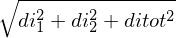

In [67]:
# Bepaal formule voor de onzekerheden:
ditot, di1, di2 = sp.symbols('ditot di1 di2')
foutformule11 = error(formule11, [itot, i1, i2], [ditot, di1, di2])
display(foutformule11)

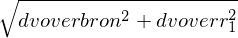

In [68]:
dvoverbron, dvoverr1, dvoverr2 = sp.symbols('dvoverbron dvoverr1 dvoverr2')
foutformule12 = error(formule12, [voverbron, voverr1], [dvoverbron, dvoverr1])
display(foutformule12)

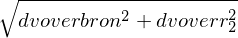

In [69]:
foutformule13 = error(formule13, [voverbron, voverr2], [dvoverbron, dvoverr2])
display(foutformule13)

In [70]:
onzekerhedeneerste = []

onzekerhedeneerste.append(foutformule11.subs({ditot:onzekeri, di1:onzekeri, di2:onzekeri}))
onzekerhedeneerste.append(foutformule12.subs({dvoverbron: onzekerv, dvoverr1:onzekerv}))
onzekerhedeneerste.append(foutformule13.subs({dvoverbron: onzekerv, dvoverr2:onzekerv}))

In [71]:
onzekerhedeneerste

In [73]:
#circuitjeee

In [75]:
vv1, vv2, vr1, vr2, vr3, vr4, vr5 = sp.symbols('vv1 vv2 vr1 vr2 vr3 vr4 vr5') 
dvv1, dvv2, dvr1, dvr2, dvr3, dvr4, dvr5 = sp.symbols('dvv1 dvv2 dvr1 dvr2 dvr3 dvr4 dvr5')
i3 = sp.symbols('i3')

In [76]:
function1 = i3 - i2 - i1
function2 = vv1 - vr4 - vr5 - vr1
function3 = vv2 - vr3 - vr2 + vv1 - vr4 - vr5

In [77]:
i1val = 4.22 * 10**-3
i2val = -3.86 * 10**-3
i3val = 0.35 * 10**-3

vv1val = 4.79
vv2val = 11.00
vr1val = 4.20
vr2val = 4.68
vr3val = 2.13
vr4val = 0.28
vr5val = 0.34

di1val = 0.05* 10**-3
di2val = 0.05* 10**-3
di3val = 0.01* 10**-3

dvv1val = 0.06
dvv2val = 0.12
dvr1val = 0.05
dvr2val = 0.06
dvr3val = 0.03
dvr4val = 0.01
dvr5val = 0.01

In [78]:
di1val = di1val/np.sqrt(12)
di2val = di2val/np.sqrt(12)
di3val = di3val/np.sqrt(12)

dvv1val = dvv1val/np.sqrt(12)
dvv2val = dvv2val/np.sqrt(12)
dvr1val = dvr1val/np.sqrt(12)
dvr2val = dvr2val/np.sqrt(12)
dvr3val = dvr3val/np.sqrt(12)
dvr4val = dvr4val/np.sqrt(12)
dvr5val = dvr5val/np.sqrt(12)

In [83]:
#Berekeneneneenene

result1 = function1.subs({i1:i1val, i2:i2val, i3:i3val})
result2 = function2.subs({vv1:vv1val , vr4:vr4val , vr5:vr5val , vr1:vr1val })
result3 = function3.subs({vv2:vv2val , vr3:vr3val , vr2:vr2val , vv1:vv1val , vr4:vr4val , vr5:vr5val })

In [84]:
display(result1, result2, result3)

In [86]:
di3 = sp.symbols('di3')
errorfunction1 = error(function1, [i1, i2, i3], [di1, di2, di3])
errorfunction2 = error(function2, [vv1, vr4, vr5, vr1], [dvv1, dvr4, dvr5, dvr1])
errorfunction3 = error(function3, [vv2, vr3, vr2, vv1, vr4, vr5], [dvv2, dvr3, dvr2, dvv1, dvr4, dvr5])

In [87]:
foutjesss = []

foutjesss.append(errorfunction1.subs({di1:di1val, di2:di2val, di3:di3val}))
foutjesss.append(errorfunction2.subs({dvv1:dvv1val , dvr4:dvr4val , dvr5:dvr5val , dvr1:dvr1val }))
foutjesss.append(errorfunction3.subs({dvv2:dvv2val , dvr3:dvr3val , dvr2:dvr2val , dvv1:dvv1val , dvr4:dvr4val , dvr5:dvr5val}))

In [88]:
foutjesss

In [90]:
R2, R1, V2 = sp.symbols('R2 R1 V2')
dR2, dR1, dV2 = sp.symbols('dR2 dR1 dV2')

thevspanning = (R2/(R1+R2))*V2

In [92]:
thevfout = error(thevspanning, [R1, R2, V2], [dR1, dR2, dV2])

In [93]:
lolz =  thevfout.subs({dR1:10/np.sqrt(12), dR2:15/np.sqrt(12), dV2: 0.12/np.sqrt(12)})

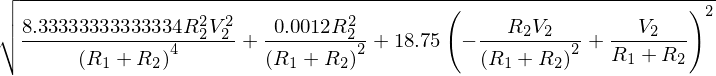

In [94]:
lolz

In [96]:
lolz2 = lolz.subs({R1:1000, R2: 1500, V2:10.97})

In [97]:
lolz2